# Exploring the Data set

Begin by importing the data from the `./data_sets` directory

In [1]:
path <- './data_sets'
setwd(path)
train <- read.csv('train.csv')
test <- read.csv('test.csv')

Let's begin exploring the data sets. The `train` data set is used to train models.

In [2]:
dim(train)

[1] 8523   12

As you can see there are 12 features and 8523 instances in the data set. 11 independent (predictor) variables and one dependent (response) variable.

The independent (predictor) variable is named `Item_Outlet_Sales`.

In [3]:
dim(test)

[1] 5681   11

In the test data set there ae only 11 features. This is because it does not contain the dependent (response) variable.

Let us take a look at the structure of the features.

In [4]:
str(train)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : Factor w/ 1559 levels "DRA12","DRA24",..: 157 9 663 1122 1298 759 697 739 441 991 ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : Factor w/ 5 levels "LF","low fat",..: 3 5 3 5 3 5 5 3 5 5 ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : Factor w/ 16 levels "Baking Goods",..: 5 15 11 7 10 1 14 14 6 6 ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : Factor w/ 10 levels "OUT010","OUT013",..: 10 4 10 1 2 4 2 6 8 3 ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : Factor w/ 4 levels "","High","Medium",..: 3 3 3 1 2 3 2 3 1 1 ...
 $ Outlet_Location_Type     : Factor w/ 3 levels "Tier 1","Tier 2",..: 1 3 1 3 3 3 3 3 2 2 ...
 $ Outlet_Type              : Factor w/ 4 levels "Grocery Store",..: 2 3 2 1 2 3 

There are several feature types here:
1. Factor features that have a number of `levels`.
2. numeric features which are continuous.
3. An integer feature.

Let's look deeper into the data and see what insights we can find.

In [5]:
summary(train)

 Item_Identifier  Item_Weight     Item_Fat_Content Item_Visibility  
 FDG33  :  10    Min.   : 4.555   LF     : 316     Min.   :0.00000  
 FDW13  :  10    1st Qu.: 8.774   low fat: 112     1st Qu.:0.02699  
 DRE49  :   9    Median :12.600   Low Fat:5089     Median :0.05393  
 DRN47  :   9    Mean   :12.858   reg    : 117     Mean   :0.06613  
 FDD38  :   9    3rd Qu.:16.850   Regular:2889     3rd Qu.:0.09459  
 FDF52  :   9    Max.   :21.350                    Max.   :0.32839  
 (Other):8467    NA's   :1463                                       
                 Item_Type       Item_MRP      Outlet_Identifier
 Fruits and Vegetables:1232   Min.   : 31.29   OUT027 : 935     
 Snack Foods          :1200   1st Qu.: 93.83   OUT013 : 932     
 Household            : 910   Median :143.01   OUT035 : 930     
 Frozen Foods         : 856   Mean   :140.99   OUT046 : 930     
 Dairy                : 682   3rd Qu.:185.64   OUT049 : 930     
 Canned               : 649   Max.   :266.89   OUT045 : 92

Here we can see some summary information such as:
1. For Continuous data such as `Item_Weight` we can see som statistical information such as the Median, Mean, Min, Max, etc... 
2. For Factored data such as `Item_Fat_Content` we can see the (most frequently found first) level names. 

Here we can see that in the `Item_Fat_Content` feature, we have mis-matched data (`LF`, `low fat`, should be rolled up into `Low Fat`; same for `reg` into `Regular`).
Let's see what other defects are in the data set.

Also, the feature `Item_Weight` had NA values. This means it is missing data.

Another way of showing where missing data is to use the `table` and `colSums` functions.

In [6]:
table(is.na(train))


 FALSE   TRUE 
100813   1463 

In [7]:
table(is.na(test))


FALSE  TRUE 
61515   976 

Both the training and testing data set have missing data. What features are missing data?

In [8]:
colSums(is.na(train))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                      1463                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

In [9]:
colSums(is.na(test))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                       976                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type 
                        0                         0

A good way to explore the data is graphically. Let's take a look at a plot of the `Item_Visibility` independent variable to the dependent variable `Item_Outlet_Sales`.

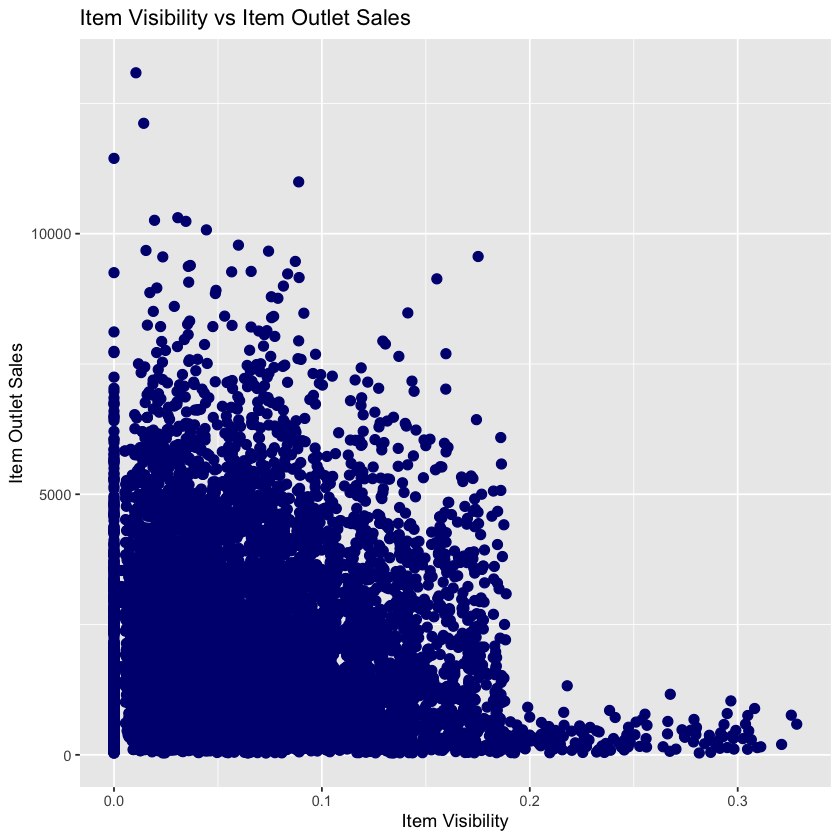

In [10]:
library(ggplot2)
ggplot(train, aes(x= Item_Visibility, y = Item_Outlet_Sales)) +
    geom_point(size = 2.5, color="navy") +
    xlab("Item Visibility") +
    ylab("Item Outlet Sales") +
    ggtitle("Item Visibility vs Item Outlet Sales")

Here we can see that the majority of the sales occured when the `Item_Visibility` is less than 0.2.

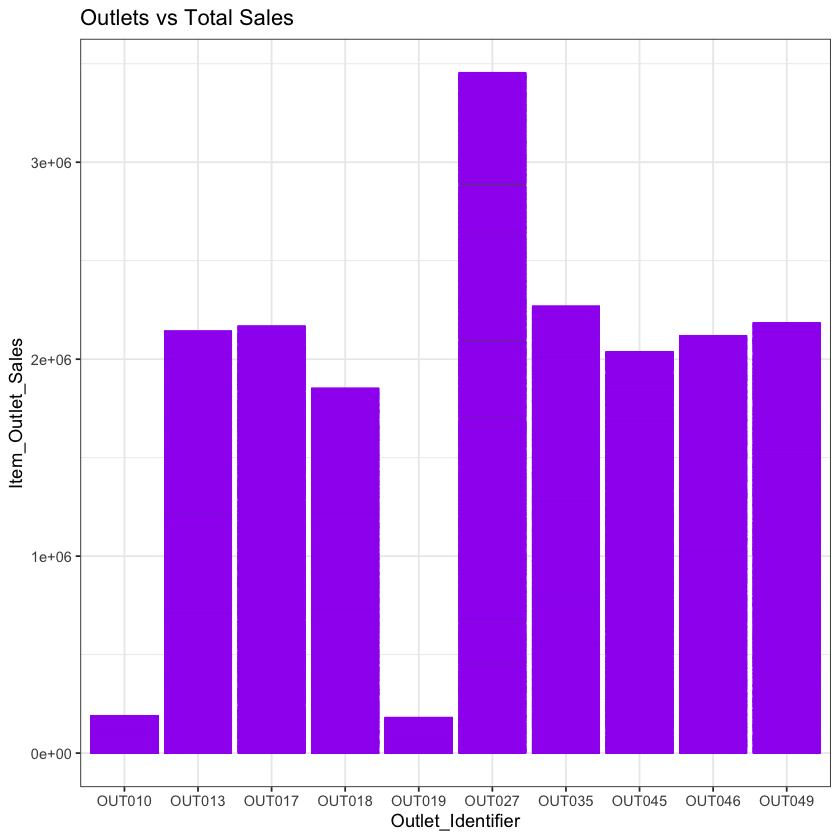

In [11]:
ggplot(train, aes(Outlet_Identifier, Item_Outlet_Sales)) +
    geom_bar(stat = "identity", color = "purple") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "black")) +
    ggtitle("Outlets vs Total Sales") +
    theme_bw()

In this histogram plot we can see that the majority of sales occured at the outlet `OUT027`.

Let's see what items move the most.

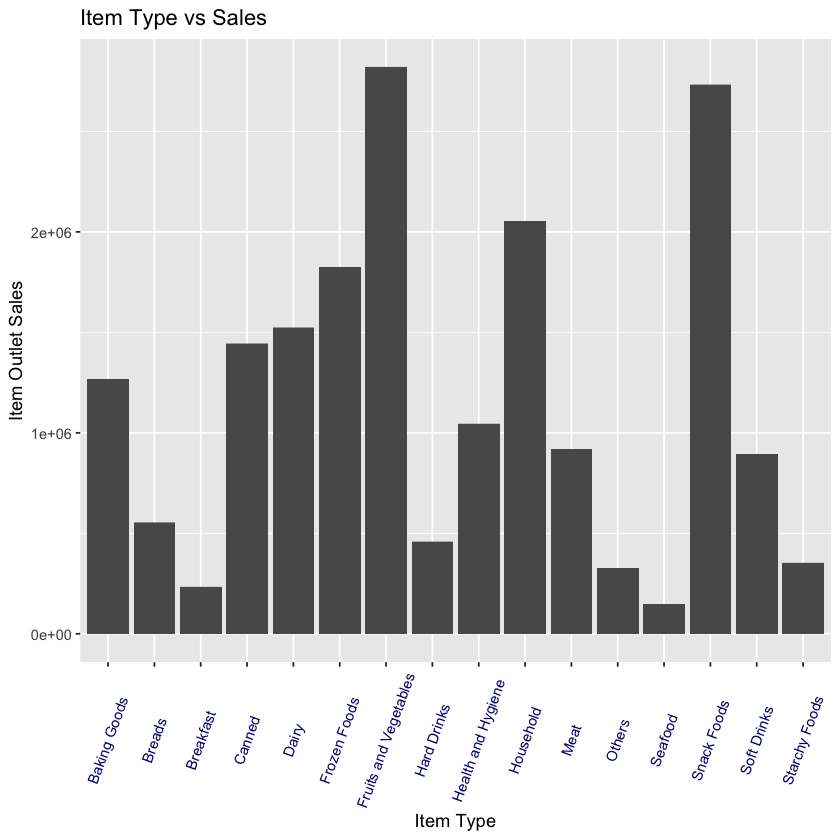

In [12]:
ggplot(train, aes(Item_Type, Item_Outlet_Sales)) +
    geom_bar( stat = "identity") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "navy")) +
    xlab("Item Type") +
    ylab("Item Outlet Sales") +
    ggtitle("Item Type vs Sales")

This shows us that the `Fruits and Vegetables` item sells the most, followed closely by `Snack Foods`.

We can also show this information using a box chart. The advantage of a box chart is that it will show us the outlier and mean deviation for the levels of the variable.

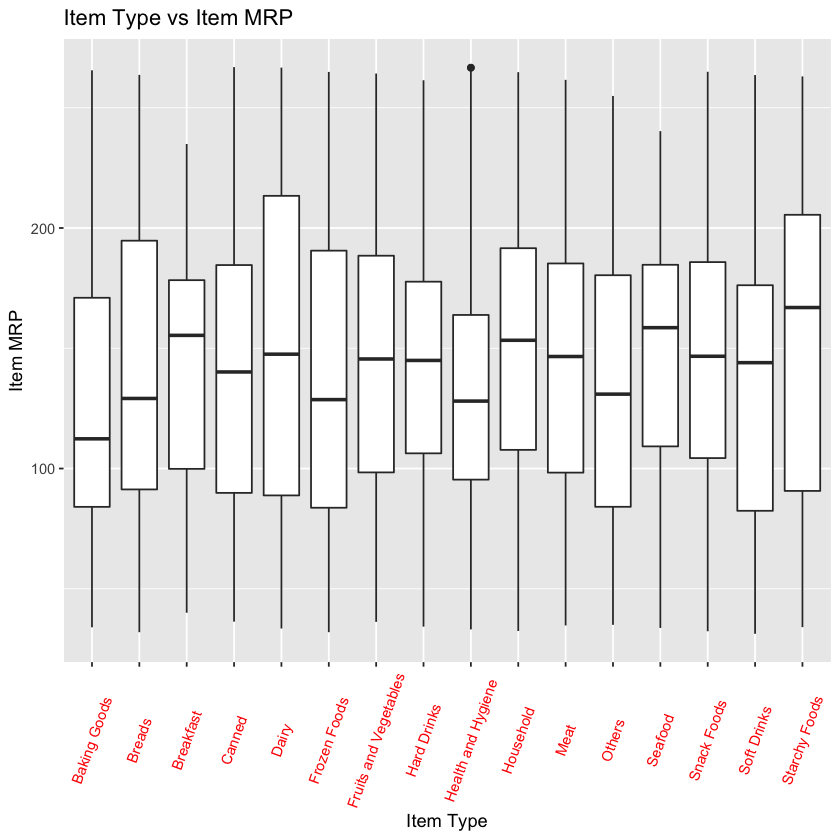

In [13]:
ggplot(train, aes(Item_Type, Item_MRP)) +
    geom_boxplot() +
    ggtitle("Box Plot") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "red")) +
    xlab("Item Type") +
    ylab("Item MRP") +
    ggtitle("Item Type vs Item MRP")

The black point you see, is an outlier. The mid line you see in the box is the mean value of each item type.